## 디다이브 Assingment - hyemin Lee

### 0. 모듈 설치

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 한글 깨짐 설치 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 58 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existen

In [3]:
#konlpy 라이브러리 설치 

%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:9 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64

bash: line 6: fg: no job control
bash: line 8: fg: no job control


### 1.    Pick an application from Google Play store with at least 1,000 reviews.

- '에이블리' : https://play.google.com/store/apps/details?id=com.banhala.android&hl=ko&gl=US&showAllReviews=true




### 2.    Crawl review data including USER, DATE, RATING, and TEXT.



- crawling file : crwaling.py


- data : name(유저네임), ratings(평점), date(날짜), comment(리뷰)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#크롤링한 데이터 불러오기

file_path = '/content/drive/MyDrive/ddive/result/1star.csv'
file_path2 = '/content/drive/MyDrive/ddive/result/2star.csv'
file_path3 = '/content/drive/MyDrive/ddive/result/3star.csv'
file_path4 = '/content/drive/MyDrive/ddive/result/4star.csv'
file_path5 = '/content/drive/MyDrive/ddive/result/5star.csv'



In [5]:
# 데이터 프레임을 생성하여, 데이터를 하나로 concat해줍니다.

reveiw = pd.DataFrame()

star_1 = pd.read_csv(file_path)
star_2 = pd.read_csv(file_path2)
star_3 = pd.read_csv(file_path3)
star_4 = pd.read_csv(file_path4)
star_5 = pd.read_csv(file_path5)

review = pd.concat([star_1,star_2,star_3,star_4,star_5])


In [6]:
# 데이터 인덱싱을 재정렬해줍니다.

review = review.reset_index(drop=True)

# 크롤링에서 필요없는 데이터 삭제 

review = review.drop(columns=['helpful','developer_comment'], axis=1)

In [7]:
review

,name,ratings,date,comment
0,jep Bak,1,2021-06-30,여러지인들과 머리핀몇개4만원상당 주문했는데..3주나걸립니다..상품준비기간이1일이라는...
1,쑈니,1,2021-07-03,이번 업데이트 진짜 별로다;; 왜 한지 모르겠음 어느 쇼핑몰에 들어가서 카테코리 선...
2,신봉근,1,2021-07-04,ㅇㄴ제가 다른 계정으로 고데기를 주문을 했는데 하루뒤에 도착이라고 떠서 일이 있어서...
3,멈멈,1,2021-06-10,내 변심으로 환불한것도 아니고 쇼핑몰측에서 품절되서 환불해주겠다고했음. 근데 환불계...
4,JI _,1,2021-06-16,여기는 품절 확인 제대로 안하시나요? 매번 품절이라고 구매하고 취소되고 한번정도는 ...
...,...,...,...,...
1915,닭칼국수,5,2021-03-14,미쳣다 와 진짜 여러분 이거 대박이에요 진짜ㅠㅠ가격도 싼편 많고 무엇보다 09년생인...
1916,예서,5,2021-02-25,저는 아주 만족스러운 앱이였어요 특히나 편의점 결제가 완전 좋더라구요 엄마 몰래 살...
1917,윤지민,5,2021-01-25,"일단 무엇보다 모든 옷이 무료배송인것, 그리고 리뷰작성시 적립금이 큰게 최대 장점인..."
1918,-선바와 잘생긴 아이돌에 진심인 편,5,2021-04-01,안녕하세요~!!! 옷에 관심이 많은데 에이블리 덕분에 쇼핑욕구 가득 채우고 있습니다...


In [8]:
#데이터 구조 확인
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     1920 non-null   object
 1   ratings  1920 non-null   int64 
 2   date     1920 non-null   object
 3   comment  1920 non-null   object
dtypes: int64(1), object(3)
memory usage: 60.1+ KB


In [9]:
#데이터의 요약 통계 확인
review.describe()

,ratings
count,1920.000000
mean,2.958333
std,1.428633
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [10]:
#데이터의 첫 5개의 값 확인
review.head() 

,name,ratings,date,comment
0,jep Bak,1,2021-06-30,여러지인들과 머리핀몇개4만원상당 주문했는데..3주나걸립니다..상품준비기간이1일이라는...
1,쑈니,1,2021-07-03,이번 업데이트 진짜 별로다;; 왜 한지 모르겠음 어느 쇼핑몰에 들어가서 카테코리 선...
2,신봉근,1,2021-07-04,ㅇㄴ제가 다른 계정으로 고데기를 주문을 했는데 하루뒤에 도착이라고 떠서 일이 있어서...
3,멈멈,1,2021-06-10,내 변심으로 환불한것도 아니고 쇼핑몰측에서 품절되서 환불해주겠다고했음. 근데 환불계...
4,JI _,1,2021-06-16,여기는 품절 확인 제대로 안하시나요? 매번 품절이라고 구매하고 취소되고 한번정도는 ...


### 3.   Tell us about pros and cons about the application based on users’ reviews.

#### 결측치 제거하기

In [11]:
 #결측값이 있는 모든 열 없애기
    
review.isnull().sum(axis=1)
print(review.dropna(axis=1).shape)

(1920, 4)


#### EDA 및 시각화

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt   #파이썬 시각화 - visualization 
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn') # seaborn 스타일로 변화
plt.rc('font' , family = 'Malgun Gothic') #맑은 고딕 사용
plt.rc('axes' , unicode_minus = False)

font_name = font_manager.FontProperties(fname="/content/drive/MyDrive/ddive/applemyungjo-regular.ttf").get_name()
rc('font', family=font_name)


### 모든 연속형 변수의 분포를 Histogram 으로 확인하기

findfont: Font family ['AppleMyungjo'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleMyungjo'] not found. Falling back to DejaVu Sans.


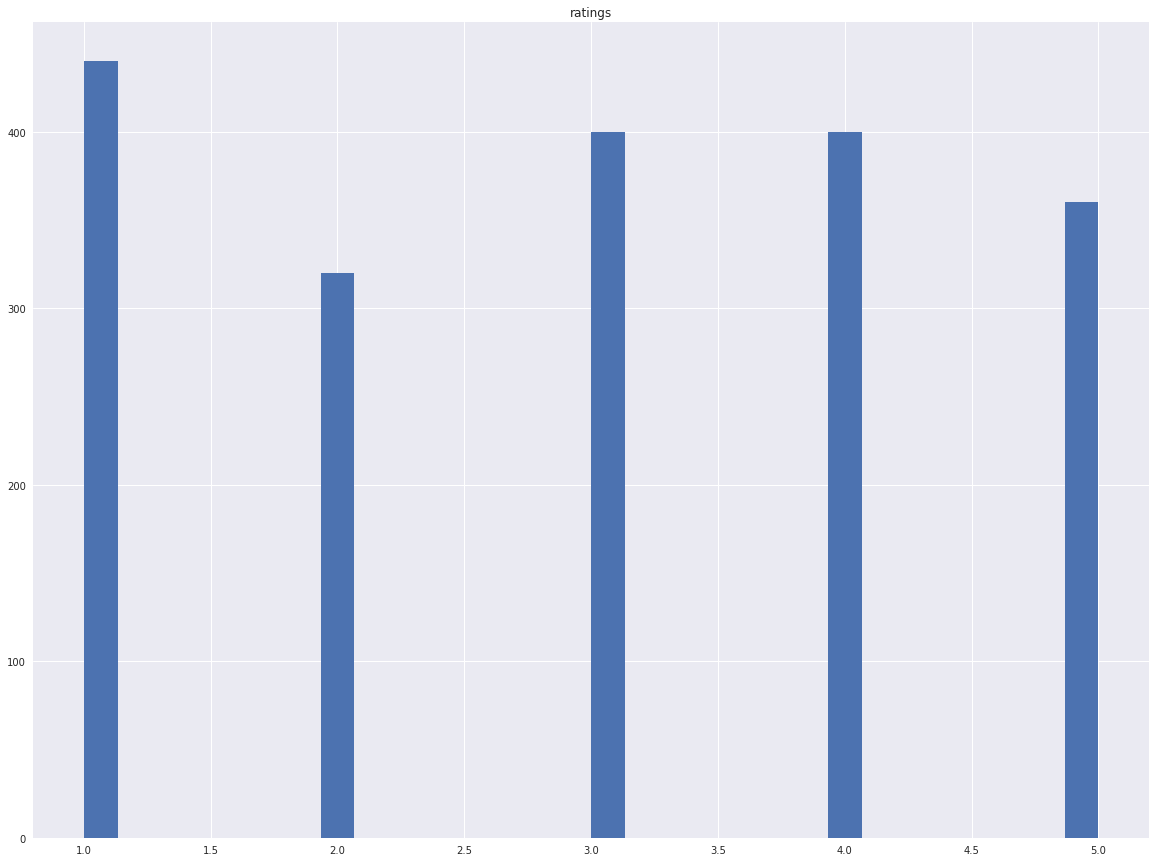

In [13]:
review.hist(bins=30,figsize=(20,15)) #figsize를 통해 plot 크기 조절
plt.show()

### 날짜별로 리뷰의 변화를 파악해보기

In [14]:
# Date 파생 변수로 부터 연/월/일 추출

review['date'] = pd.to_datetime(review['date'])
review['yyyy'] = review['date'].dt.strftime('%Y')
review['mm'] = review['date'].dt.strftime('%m')
review['dd'] = review['date'].dt.strftime('%d')

review

,name,ratings,date,comment,yyyy,mm,dd
0,jep Bak,1,2021-06-30,여러지인들과 머리핀몇개4만원상당 주문했는데..3주나걸립니다..상품준비기간이1일이라는...,2021,06,30
1,쑈니,1,2021-07-03,이번 업데이트 진짜 별로다;; 왜 한지 모르겠음 어느 쇼핑몰에 들어가서 카테코리 선...,2021,07,03
2,신봉근,1,2021-07-04,ㅇㄴ제가 다른 계정으로 고데기를 주문을 했는데 하루뒤에 도착이라고 떠서 일이 있어서...,2021,07,04
3,멈멈,1,2021-06-10,내 변심으로 환불한것도 아니고 쇼핑몰측에서 품절되서 환불해주겠다고했음. 근데 환불계...,2021,06,10
4,JI _,1,2021-06-16,여기는 품절 확인 제대로 안하시나요? 매번 품절이라고 구매하고 취소되고 한번정도는 ...,2021,06,16
...,...,...,...,...,...,...,...
1915,닭칼국수,5,2021-03-14,미쳣다 와 진짜 여러분 이거 대박이에요 진짜ㅠㅠ가격도 싼편 많고 무엇보다 09년생인...,2021,03,14
1916,예서,5,2021-02-25,저는 아주 만족스러운 앱이였어요 특히나 편의점 결제가 완전 좋더라구요 엄마 몰래 살...,2021,02,25
1917,윤지민,5,2021-01-25,"일단 무엇보다 모든 옷이 무료배송인것, 그리고 리뷰작성시 적립금이 큰게 최대 장점인...",2021,01,25
1918,-선바와 잘생긴 아이돌에 진심인 편,5,2021-04-01,안녕하세요~!!! 옷에 관심이 많은데 에이블리 덕분에 쇼핑욕구 가득 채우고 있습니다...,2021,04,01


### 리뷰 연도별 분포
연도별 분포를 통해서 에이블리는 7월을 기준으로 크롤링 하였음에도 리뷰의 건수가 2021년이 제일 많음을 보아, 앱의 사용자가 많아졌음을 파악할 수 있다.

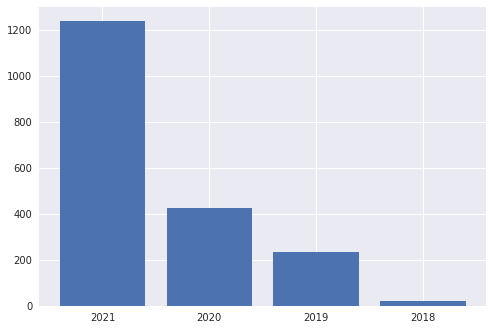

2021    1239
2020     425
2019     236
2018      20
Name: yyyy, dtype: int64

In [15]:
#Auciton_class의 범주 값들을 count하여 변수 Bid에 넣기
rate = review['yyyy'].value_counts() 

#bar로 시각화
plt.bar(rate.index,rate)  
plt.show()

rate

#### 연도/월로 시각화 해본 결과, 2021년 4월부터 에이블리 어플의 사용자가 확연하게 늘어난 것을 구체적으로 확인할 수 있었다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
findfont: Font family ['AppleMyungjo'] not found. Falling back to DejaVu Sans.


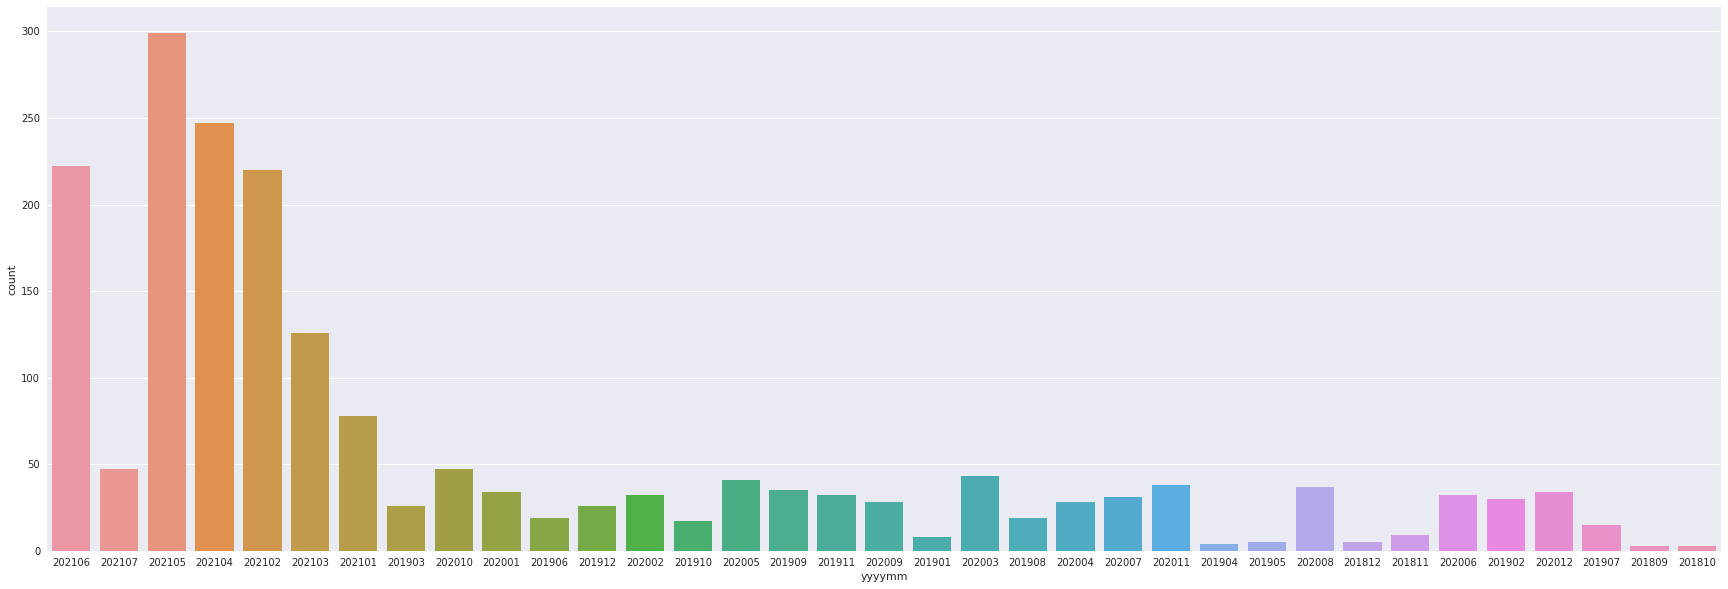

In [16]:
# 리뷰 연도별 분포
# 2021년도의 리뷰 건수에 대해서 구체적으로 파악하기 위해서 연도/월을 다시 시각화 해보았다.

review['yyyymm'] = review['date'].dt.strftime('%Y%m')

f, ax = plt.subplots(1, 1, figsize=(30, 10))
sns.countplot('yyyymm', data=review)

plt.show()


### 평점 시각화

평점은 크롤링에서 수집한대로 분포가 골고루 되어있는 데이터를 사용하여 분석하였다.

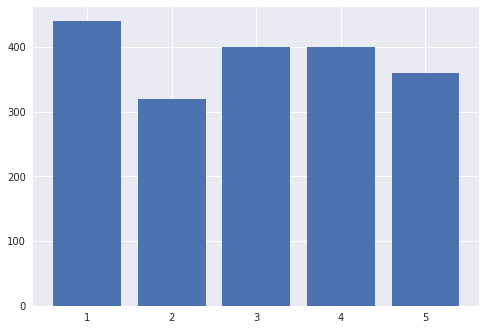

In [17]:
#Auciton_class의 범주 값들을 count하여 변수 Bid에 넣기
rate = review['ratings'].value_counts() 

#bar로 시각화
plt.bar(rate.index,rate)  
plt.show()

In [18]:
#평점 별 데이터 개수 확인
rate

1    440
3    400
4    400
5    360
2    320
Name: ratings, dtype: int64

In [19]:
len(review['comment'])

1920

#### 형태소 분석

In [20]:
import konlpy
import nltk
from konlpy.tag import Kkma, Komoran, Hannanum
from konlpy.utils import pprint
from konlpy.tag import Mecab

from konlpy.tag import Okt; t = Okt()

In [21]:
content_text = ''
for each_line in review['comment'][:2000]:
  content_text = content_text + each_line + '\n'

content_text

'여러지인들과 머리핀몇개4만원상당 주문했는데..3주나걸립니다..상품준비기간이1일이라는데..상품재고도 없이 판매하는 마켓...배송지연이라 메세지도 없어. 구매자가 먼저 말해야 답변이랍시고 주고..역시중국산..가격에비해 퀄리티 많이떨어져요..그마켓을 믿은것보다."에이블리"믿고 주문했는데.완전실망스럽네요..이번거래 끝나면 탈퇴각이요.마켓대변인만 하는 대한민국1등쇼핑몰\n이번 업데이트 진짜 별로다;; 왜 한지 모르겠음 어느 쇼핑몰에 들어가서 카테코리 선택한 후에 옛날처럼 정렬,키,색상,가격 이런거 선택할수 있었으면 좋겠음\nㅇㄴ제가 다른 계정으로 고데기를 주문을 했는데 하루뒤에 도착이라고 떠서 일이 있어서 몇시간 뒤에 찾으러 갔는데 없어요 제돈만 날린건지 아님 다른데로 잘못 배송이 됬는지 몰 라도 어떻게든 배상 받고싶습니다!!!😡😡\n내 변심으로 환불한것도 아니고 쇼핑몰측에서 품절되서 환불해주겠다고했음. 근데 환불계좌를 옛날에 등록해놔서 환불안내받자 환불계좌 바꾸고싶다고 연락함. 쇼핑몰측이 답장하길 자기네는 이미 환불완료해서 에이블리측에 문의하라함. 에이블리측에 바로 문의함. 안봄. 결국 변경안한채로 당일 환불됌. 환불되자마자 이미 환불완료되서 안된다고 문의답장 옴. 이게뭐예영ㅋㅋㅋㅋㅋ진짜개별로.ㅎ연예인 모델 섭외할 시간에 더 빠른 컨슈머대응이 훨씬 필요할듯\n여기는 품절 확인 제대로 안하시나요? 매번 품절이라고 구매하고 취소되고 한번정도는 이해하겠는데 산거 3번은 그러네요ㅎ 진짜 소비자 두고 장난질하는 것도 아니고 중간에서 중개하는 거면 제대로 해야지 가게랑 품절 확인도 안하고 판매만 하면 끝이다~ 이런 건가요? 마인드 개별로네요\n배송은 느리고 판매자는 문의글에 답도 없고 한참 만에 온 물건은 구매한거랑 전혀 다른 옷 이고 반품신청했는데 역시 답은없고 전화를 해야 해결이 되려나;;\n회원가입을 하려고하니깐 회원가입이 되있다고해서 아이디 찾기해서 아이디 치고 로그인하려고하면 없는 아이디라고 하고 그래서 회원가입 하려고하니깐 있는 아이디라고 되있고 문의하려고하니깐 로

In [22]:
tokens_ko = t.morphs(content_text)
tokens_ko

['여러',
 '지인',
 '들',
 '과',
 '머리핀',
 '몇개',
 '4만원',
 '상당',
 '주문',
 '했는데',
 '..',
 '3',
 '주',
 '나',
 '걸립니다',
 '..',
 '상품',
 '준비',
 '기간',
 '이',
 '1일',
 '이라는데',
 '..',
 '상품',
 '재고',
 '도',
 '없이',
 '판매',
 '하는',
 '마켓',
 '...',
 '배송',
 '지연',
 '이라',
 '메세지',
 '도',
 '없어',
 '.',
 '구매',
 '자',
 '가',
 '먼저',
 '말',
 '해야',
 '답변',
 '이',
 '랍시고',
 '주고',
 '..',
 '역시',
 '중국산',
 '..',
 '가격',
 '에',
 '비해',
 '퀄리티',
 '많이',
 '떨어져요',
 '..',
 '그',
 '마켓',
 '을',
 '믿은것보다',
 '."',
 '에이',
 '블리',
 '"',
 '믿고',
 '주문',
 '했는데',
 '.',
 '완전',
 '실망',
 '스럽네요',
 '..',
 '이번',
 '거래',
 '끝나면',
 '탈퇴',
 '각',
 '이요',
 '.',
 '마켓',
 '대변인',
 '만',
 '하는',
 '대한민국',
 '1등',
 '쇼핑몰',
 '\n',
 '이번',
 '업데이트',
 '진짜',
 '별로',
 '다',
 ';;',
 '왜',
 '한지',
 '모르겠음',
 '어느',
 '쇼핑몰',
 '에',
 '들어가서',
 '카테',
 '코리',
 '선택',
 '한',
 '후',
 '에',
 '옛날',
 '처럼',
 '정렬',
 ',',
 '키',
 ',',
 '색상',
 ',',
 '가격',
 '이런거',
 '선택',
 '할수',
 '있었으면',
 '좋겠음',
 '\n',
 'ㅇㄴ',
 '제',
 '가',
 '다른',
 '계정',
 '으로',
 '고데',
 '기를',
 '주문',
 '을',
 '했는데',
 '하루',
 '뒤',
 '에',
 '도착',
 '이라고',
 '떠서',
 '일이',
 '있어

In [23]:
ko = nltk.Text(tokens_ko)
print(len(ko.tokens)) #토큰 전체 갯수
print(len(set(ko.tokens))) # 토큰 unique 개수

75079
9701


#### (1) 빈출 상위 100개 단어 (Stop words 포함)

nltk.Text()를 사용하여 전체 리뷰에서 사용되었던 빈출 상위 100개에 대해서 추출하였다.

해당 결과를 보면 불용어 (stop words)가 많이 들어있는 것을 확인할 수 있다.

In [24]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)


[('이', 1973),
 ('\n', 1920),
 ('.', 1311),
 ('도', 1153),
 ('에', 1040),
 ('가', 994),
 ('을', 878),
 ('옷', 795),
 ('배송', 730),
 ('..', 606),
 ('안', 577),
 ('은', 548),
 ('상품', 523),
 ('를', 511),
 ('너무', 509),
 ('들', 491),
 ('다', 488),
 ('앱', 397),
 ('는', 388),
 ('만', 359),
 ('?', 354),
 ('하고', 338),
 ('한', 332),
 ('...', 328),
 ('요', 325),
 (',', 323),
 ('것', 322),
 ('에서', 297),
 ('으로', 295),
 ('좀', 294),
 ('로', 281),
 ('좋아요', 270),
 ('쿠폰', 268),
 ('주문', 266),
 ('제', 261),
 ('수', 251),
 ('진짜', 250),
 ('에이', 249),
 ('취소', 238),
 ('무료', 238),
 ('구매', 232),
 ('때', 228),
 ('할', 225),
 ('리뷰', 225),
 ('다른', 224),
 ('잘', 224),
 ('!', 218),
 ('블리', 214),
 ('좋은데', 212),
 ('가격', 211),
 ('결제', 208),
 ('못', 202),
 ('했는데', 194),
 ('해서', 187),
 ('환불', 186),
 ('왜', 183),
 ('더', 181),
 ('사용', 181),
 ('거', 179),
 ('점', 179),
 ('그', 176),
 ('문의', 171),
 ('많이', 164),
 ('그리고', 163),
 ('쇼핑몰', 159),
 ('고', 159),
 ('ㅠㅠ', 157),
 ('같아요', 153),
 ('에이블리', 150),
 ('검색', 149),
 ('정말', 148),
 ('마켓', 147),
 ('의', 147),


#### (2) 불용어 제거 후 상위 50위 다시 확인 

In [25]:
stop_words = ['.','좋은데','할','정말','나','안','하고','만','의','주','개','!','한','에서','더','그','저','ㅠㅠ','?',',','\n','가','요','...','을','수','에','질문','제','를','이','도','좋','1','는','로','으로','2','것','은','다',',','니다','대','들','데','..','2020','2021','때','것','고','거','좀','는데','~','ㅎㅎ','하나','이상','뭐','까','있는','잘','습니다','다면','했','주려','지','있','못','후','줄','중','과','어떤','다면','잘','습니다','했','주려','지','있','못','어떤','과','중요한','단어','라고','가요','까요','....','ㅋㅋ','ㅋㅋㅋ','보이','네']

In [26]:
tokens_ko = [each_word for each_word in tokens_ko 
           if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
data = ko.vocab().most_common(50)
data

[('옷', 795),
 ('배송', 730),
 ('상품', 523),
 ('너무', 509),
 ('앱', 397),
 ('좋아요', 270),
 ('쿠폰', 268),
 ('주문', 266),
 ('진짜', 250),
 ('에이', 249),
 ('취소', 238),
 ('무료', 238),
 ('구매', 232),
 ('리뷰', 225),
 ('다른', 224),
 ('블리', 214),
 ('가격', 211),
 ('결제', 208),
 ('했는데', 194),
 ('해서', 187),
 ('환불', 186),
 ('왜', 183),
 ('사용', 181),
 ('점', 179),
 ('문의', 171),
 ('많이', 164),
 ('그리고', 163),
 ('쇼핑몰', 159),
 ('같아요', 153),
 ('에이블리', 150),
 ('검색', 149),
 ('마켓', 147),
 ('계속', 146),
 ('제품', 144),
 ('케이스', 133),
 ('하면', 131),
 ('가입', 129),
 ('다시', 127),
 ('좋겠어요', 126),
 ('배송비', 126),
 ('하는', 125),
 ('적', 123),
 ('품절', 122),
 ('서', 122),
 ('이라', 121),
 ('내', 118),
 ('전', 118),
 ('게', 117),
 ('어플', 117),
 ('인', 116)]

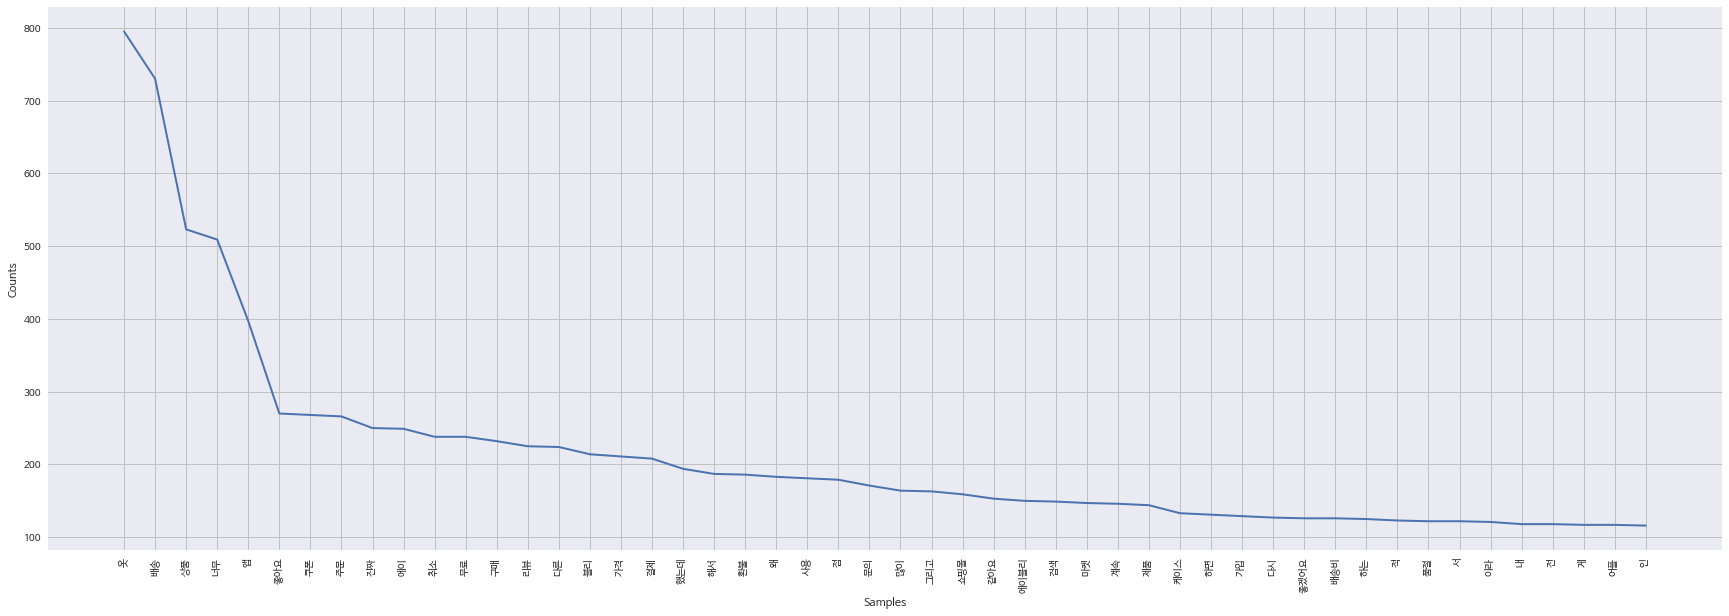

In [27]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz

plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(30,10))
ko.plot(50)

plt.show()


stop words 리스트를 만들고 제거하여, 새롭게 상위 50개를 추출하여 에이블리 서비스의 장단점에 대해서 추측해볼 수 있었다.

- 장점 
1. 빠른 서비스 : 전체적으로 옷, 배송, 상품에 대한 단어가 상대적으로 많이 들어가 있었으며 '좋아요'라는 단어의 빈도수를 파악하였을 때 기본적인 서비스에 대한 만족도가 많은 것으로 예상할 수 있음
2. 무료 배송 : 배송이 무료인 부분이 사용자의 입장에서 큰 부분이기 때문에 큰 만족도를 줄 수 있었을 것으로 예상됨
3. 쿠폰 제공 : 다른 서비스에 비해서 에이블리의 쿠폰 제공이 잘 이루어지고 있음을 확인할 수 있음


- 단점 (아마도 1:1 응답 서비스에서 해결하지 못하는 부분이 어플 리뷰로 넘어왔을 것이다.)
1. 품절 : 다양한 옷가게들을 에이블리 하나로 사용하다보니, 품절에 대한 부분이 잦을 수 밖에 없음 
2. 환불 : 환불에 대한 문제를 제대로 해결받지 못하는 부분이 존재하고 있음

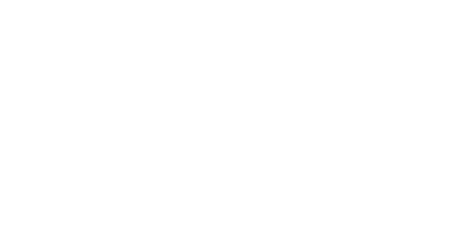

In [39]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='/content/drive/MyDrive/ddive/applemyungjo-regular.ttf',
                      relative_scaling =0.2,
                      background_color = 'white',).generate_from_frequencies(dict(data))
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 4.    Run LDA topic modeling and try to find insights from modeling.

#### 데이터 전처리 / 불용어 제거

In [30]:
# 불용어 제거
import re
re.compile('<title>(.*)</title>')

def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n',' ', text)
    text = re.sub('[.,;:\)(*?!~#$%&=#}{ㄱㄴㄷㄹㅁㅂㅅㅇㅈㅊㅋㅌㅍㅎㅠㅜ]','',text)
    #중복생성 공백값
    text = re.sub(' +', ' ', text)
    return text
                  
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = "어요 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓"
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

review['NEW'] = review['comment'].apply(remove_stopwords)
review['NEW'] = review['NEW'].apply(preprocessing)
review['NEW'].head(10)

0    여러지인들과 머리핀몇개4만원상당 주문했는데3주나걸립니다상품준비기간이1일이라는데상품재...
1    업데이트 별로다 한지 모르겠음 쇼핑몰에 들어가서 카테코리 선택한 후에 옛날처럼 정렬...
2    제가 계정으로 고데기를 주문을 했는데 하루뒤에 도착이라고 떠서 일이 있어서 몇시간 ...
3    변심으로 환불한것도 아니고 쇼핑몰측에서 품절되서 환불해주겠다고했음 근데 환불계좌를 ...
4    여기는 품절 확인 제대로 안하시나요 품절이라고 구매하고 취소되고 한번정도는 이해하겠...
5    배송은 느리고 판매자는 문의글에 답도 한참 만에 온 물건은 구매한거랑 전혀 옷 반품...
6    회원가입을 하려고하니깐 회원가입이 되있다고해서 아이디 찾기해서 아이디 치고 로그인하...
7    에이블리 일을 안하는것 같에요 상품을 일주일 전에 주문했는데 갑자기 일주일뒤에 연락...
8     배송 너무 느리네요 질문했더니 답변도 불쾌하구요 관리가 안되는듯 어플 삭제합니다 수고요
9    요즘 에이블리에 실망이 커지네요 배송도 점점 느려지고 쿠폰수도 줄어들고 있어요 고급...
Name: NEW, dtype: object

#### 전처리 (주어, 불필요한 조사 등등 제거)

In [31]:
import nltk

nltk.download('punkt')

review['NEW'] = review.apply(lambda row: nltk.word_tokenize(row['NEW']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
tokenized_doc = review['NEW'].apply(lambda x: [word for word in x if len(word) < 5 and len(word) > 2])
len_star = len(tokenized_doc)
len_star

tokenized_doc.head(10)

0              [판매하는, 메세지도, 구매자가, 말해야, 퀄리티, 에이블리, 끝나면]
1    [업데이트, 별로다, 모르겠음, 쇼핑몰에, 들어가서, 카테코리, 선택한, 옛날처럼,...
2    [계정으로, 고데기를, 주문을, 했는데, 하루뒤에, 있어서, 몇시간, 찾으러, 갔는...
3    [변심으로, 아니고, 품절되서, 옛날에, 환불계좌, 연락함, 답장하길, 자기네는, ...
4    [여기는, 제대로, 구매하고, 취소되고, 3번은, 그러네요, 소비자, 아니고, 중간...
5     [배송은, 느리고, 판매자는, 문의글에, 물건은, 답은없고, 전화를, 해결이, 되려나]
6    [아이디, 찾기해서, 아이디, 회원가입, 되있고, 이용하죠, 싶어도, 못쓰도록, 할...
7    [에이블리, 안하는것, 같에요, 상품을, 일주일, 갑자기, 연락와서, 확인좀, 제대...
8                          [느리네요, 답변도, 관리가, 안되는듯, 수고요]
9    [실망이, 커지네요, 배송도, 느려지고, 쿠폰수도, 줄어들고, 있어요, 다양한, 쿠...
Name: NEW, dtype: object

In [33]:
tokenized_doc[300]

['보기도',
 '안되고',
 '사용했던',
 '쿠폰을',
 '준대요',
 '변심으로',
 '주문취소',
 '할수도',
 '있는데',
 '쿠폰은',
 '앱들과',
 '비교가',
 '주문한',
 '환불처리',
 '할꺼임']

In [34]:
# 역토큰화 (토큰화 작업을 되돌림)

detokenized_doc = []
for i in range(len(review)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

review['NEW_full'] = detokenized_doc

review['NEW_full'][:5]

0                      판매하는 메세지도 구매자가 말해야 퀄리티 에이블리 끝나면
1    업데이트 별로다 모르겠음 쇼핑몰에 들어가서 카테코리 선택한 옛날처럼 이런거 선택할수...
2    계정으로 고데기를 주문을 했는데 하루뒤에 있어서 몇시간 찾으러 갔는데 없어요 제돈만...
3    변심으로 아니고 품절되서 옛날에 환불계좌 연락함 답장하길 자기네는 문의함 환불됌 안...
4    여기는 제대로 구매하고 취소되고 3번은 그러네요 소비자 아니고 중간에서 중개하는 제...
Name: NEW_full, dtype: object

#### 토픽 모델링

- max_features값을 500으로 설정하여 상위 500개 단어 보존하였다.
- topic의 수를 14, radom_state 800으로 파라미터 값을 설정하였을 때의 결과를 통해서 토픽의 내용을 가장 잘 추측할 수 있었다.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer().fit_transform(review['NEW_full'])
tfidfv.toarray()

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features= 500) # 상위 1,000개의 단어를 보존 
X = vectorizer.fit_transform(review['NEW_full'])
X.shape # TF-IDF 행렬의 크기 확인



(1920, 500)

In [36]:
!pip install --upgrade tomotopy

from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=14,learning_method='online',random_state=800,max_iter=1)

lda_top=lda_model.fit_transform(X)

print(lda_model.components_)
print(lda_model.components_.shape) 

lda_top[0]

Requirement already up-to-date: tomotopy in /usr/local/lib/python3.7/dist-packages (0.12.1)
[[0.17423485 0.16430143 0.48931173 ... 0.19696526 1.88484203 0.17295506]
 [0.18129507 0.19794753 0.39007608 ... 0.19215996 0.17109869 1.55425766]
 [0.1834948  3.49731849 0.17127995 ... 0.16354437 0.16216153 5.04153657]
 ...
 [0.16589517 0.1650618  0.17205456 ... 0.19922764 0.18275614 0.31887388]
 [0.19849483 0.15441697 0.16964797 ... 0.18772322 0.18025396 0.22210312]
 [3.00035845 0.14997303 0.18485875 ... 0.17860373 0.18475816 0.48605856]]
(14, 500)


array([0.02672304, 0.02672328, 0.02672302, 0.02672313, 0.02672302,
       0.02672307, 0.02672302, 0.02672315, 0.02672306, 0.02672382,
       0.65259921, 0.02672312, 0.02672305, 0.02672303])

In [37]:
terms = vectorizer.get_feature_names()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_, terms)

Topic 1: [('많아요', 21.07), ('좋네요', 17.63), ('상품이', 8.19), ('아이폰', 5.42), ('굉장히', 4.45)]
Topic 2: [('좋아요', 94.3), ('갑자기', 18.69), ('다양한', 15.06), ('많아서', 13.27), ('편리하고', 12.89)]
Topic 3: [('원하는', 5.78), ('찾기가', 5.54), ('스타일을', 5.23), ('힘들어요', 5.04), ('카테고리', 4.68)]
Topic 4: [('쇼핑몰', 11.14), ('좋은데요', 5.5), ('여러가지', 4.58), ('깔았는데', 4.49), ('안되네요', 4.35)]
Topic 5: [('사용하기', 8.53), ('없어요', 7.24), ('다좋은데', 6.76), ('불편해요', 6.7), ('종류가', 4.96)]
Topic 6: [('있어서', 25.09), ('다양하게', 7.58), ('쇼핑하기', 7.42), ('편해요', 7.29), ('사이즈', 7.1)]
Topic 7: [('많아서', 8.0), ('좋았어요', 7.06), ('한눈에', 7.03), ('있네요', 6.68), ('편하게', 6.5)]
Topic 8: [('한번에', 13.13), ('리뷰를', 11.03), ('포인트', 9.28), ('쿠폰이', 8.89), ('서버가', 8.45)]
Topic 9: [('다양하고', 20.43), ('같아요', 20.11), ('좋아요', 15.61), ('있어요', 12.58), ('스타일', 10.27)]
Topic 10: [('에이블리', 14.72), ('좋아하는', 7.46), ('좋지만', 5.91), ('할인도', 5.77), ('안되나요', 5.04)]
Topic 11: [('좋은데', 45.52), ('배송비가', 12.15), ('있으면', 10.68), ('좋겠어요', 10.55), ('비슷한', 9.71)]
Topic 12: [('배송이', 12.01), (

전체적으로 아래와 같은 사용자 리뷰들에 대한 topic을 뽑아낼 수 있었다. 
1. 다양한 스타일의 상품이 많아서 좋다
2. 본인이 원하는 스타일을 찾기가 힘들다.
3. 특정 사이즈나 종류의 옷이 없다(품절)
4. 할인이나 쿠폰을 자주 공유하면 좋겠다.
5. 무료배송은 좋은데 배송 속도가 느린 편이다.

### 5.    Visualize your work.

In [38]:
# pyLDAvis를 사용하여 topic과 단어 시각화를 진행하는 방법은 이해하였으나, 
# gensim에 대한 이해력이 아직 부족하여 사이킷런으로 모델링하는 과정까지 진행하였습니다.


# import pyLDAvis
# pyLDAvis.display()